# Sushma
# Erick
# Mihir

# Logistic regression

Required libraries: 

In [5]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


Load the MNIST dataset

In [6]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Parameters and functions required for the logistic regression model

In [7]:
# Hyperparameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1
num_adversaries = 100
eps = 0.1
adversarial_images_log = []


# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
# W = tf.Variable(tf.zeros([784, 10]))
W = tf.Variable(tf.random_uniform([784, 10]))

b = tf.Variable(tf.zeros([10]))

# Construct model
y_pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
# y_pred = tf.matmul(x, W) + b

# Minimize error using cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_pred), reduction_indices=1))
# loss = tf.reduce_mean(tf.square(y_pred - y))
grad_input = tf.gradients(loss, x)[0]

# Gradient Descent
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()




Training of the model, testing the model and creation of adversarial examples

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    
    print("Starting training")
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # Fit training using batch data
            _, c = sess.run([optimizer, loss], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
            
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print ("Training Finished!")
    
    print("Starting testing")
    # Test model
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
    
    # Accuracy model
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    #Calculating the accuracy with the testing data.
    print ("Accuracy Testing:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
       
    #prediction for one image
#     y_prediction = sess.run([y_pred], feed_dict={x:  mnist.test.images,y:  mnist.test.labels})
#     print (np.argmax(y_prediction),np.max(y_prediction))
#     print (y_prediction)
    
    #Creation of 100 adversarial examples for logistic regression
    grad = sess.run([grad_input], feed_dict={x:  mnist.test.images,y:  mnist.test.labels})
    grad = np.array(grad)
    grad = grad.reshape(10000,784)

    for i in range(num_adversaries):
        img_ad = mnist.test.images[i] + eps * np.sign(grad[mnist.test.labels.tolist()[i].index(1.0)]) 
        adversarial_images_log.append(img_ad)
        
#     plt.imshow(adversarial_images[i].reshape(28,28), cmap='binary')
    
    #Prediction for adversial image
    y_prediction = sess.run([y_pred], feed_dict={x:  adversarial_images_log,y:  mnist.test.labels[:100]})
    
    #Calculate the accuracy of the adversarials
    print ("Accuracy Adversarial:", accuracy.eval({x: adversarial_images_log, y: mnist.test.labels[:100]}))
#     print (np.argmax(y_prediction),np.max(y_prediction))
#     print (y_prediction)
    

Starting training
Epoch: 0001 cost= 2.068462734
Epoch: 0002 cost= 0.994621365
Epoch: 0003 cost= 0.753756000
Epoch: 0004 cost= 0.647800648
Epoch: 0005 cost= 0.587235334
Epoch: 0006 cost= 0.547386595
Epoch: 0007 cost= 0.518613613
Epoch: 0008 cost= 0.496687653
Epoch: 0009 cost= 0.479209448
Epoch: 0010 cost= 0.464906521
Epoch: 0011 cost= 0.452799946
Epoch: 0012 cost= 0.442484938
Epoch: 0013 cost= 0.433469348
Epoch: 0014 cost= 0.425543361
Epoch: 0015 cost= 0.418538693
Epoch: 0016 cost= 0.412196707
Epoch: 0017 cost= 0.406483005
Epoch: 0018 cost= 0.401226108
Epoch: 0019 cost= 0.396465216
Epoch: 0020 cost= 0.392109758
Epoch: 0021 cost= 0.387994722
Epoch: 0022 cost= 0.384224203
Epoch: 0023 cost= 0.380759731
Epoch: 0024 cost= 0.377434300
Epoch: 0025 cost= 0.374369087
Training Finished!
Starting testing
Accuracy Testing: 0.8968
Accuracy Adversarial: 0.45


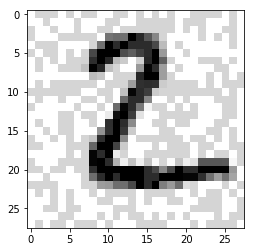

In [14]:
plt.imshow(adversarial_images_log[1].reshape(28,28), cmap='binary')

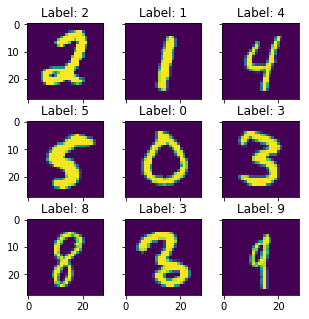

In [9]:
#https://github.com/jasonicarter/MNIST-adversarial-images/blob/master/MNIST-adversarial-images.ipynb
image_list = mnist.train.images[0:9]
image_list_labels = mnist.train.labels[0:9]

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#imagegrid
fig = plt.figure(1, (5., 5.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 )

for i in range(len(image_list)):
    image = image_list[i].reshape(28,28)
    grid[i].imshow(image)
    grid[i].set_title('Label: {0}'.format(image_list_labels[i].argmax()))

plt.show()

In [10]:
len(mnist.test.images)

10000

5 Use the adversarial examples of A with model B, and the adversarial examples of B with model A. Do they fool each other?

generate 60000 new adversarial examples (same size as the training set) and create a new training set containing both the original training data and your adversarial examples. Train both models again with this new training set, and evaluate it with the original MNIST test set. Then answer the following questions:

   - Does classification performance improve?

   - Is the new model less or more susceptible to adversarial examples?

   - Do you think you can use a regularization method in order to make the model less susceptible to adversarial examples?

In [ ]:
adversarial_images_ultimate = []
num_adversaries_ultimate = len(mnist.train.images)
with tf.Session() as sess:
    sess.run(init)
    print("Creating ... {} training examples" .format(num_adversaries_ultimate))
    #Creation of same number of training data of adversarial examples 
    # for logistic regression
    grad = sess.run([grad_input], feed_dict={x:  mnist.train.images,y:  mnist.train.labels})
    grad = np.array(grad)
    grad = grad.reshape(55000,784)

    for i in range(num_adversaries_ultimate):
        img_ad = mnist.train.images[i] + eps * np.sign(grad[mnist.train.labels.tolist()[i].index(1.0)]) 
        adversarial_images_ultimate.append(img_ad)
    
    print("Finishing generating the adversarial examples")
    print("Number of adversarials", len(adversarial_images_ultimate))

Creating ... 55000 training examples
